In [22]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [23]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [24]:
g1 = gaussian(np.ones(2),
              np.array([0,0]),
              np.array([2,1]))
g2 = gaussian(np.ones(2),
              np.array([-2,2]),
              np.array([1,2]))
g3 = gaussian(np.ones(2),
              np.array([3,-3]),
              np.array([1,1]))
gaussians = [g1, g2, g3]

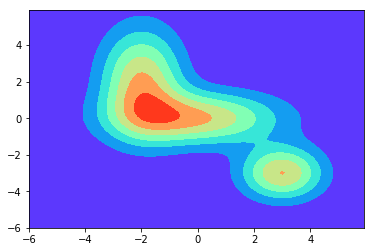

In [25]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sum(g.get_value([xx, yy]) for g in gaussians)
h = plt.contourf(x,y,z)

In [32]:
num_particles = 500
num_steps = 1000
x0s = np.random.uniform(-6, 6, size=(2, num_particles))
parameters = {
    'name': 'equilibrium_test',
    'num_steps': num_steps,
    'num_dim': 2,
    'num_particles': num_particles,
    'KBT': 1,
    'Ddt': 0.01,
    'x0': x0s,
    'potential': potential(gaussians)
}

In [33]:
Xs = simulate(parameters)

In [34]:
Xs_all = np.empty(2)
for i in range(num_particles):
    Xs_all = np.vstack((Xs_all, Xs[:,:,i]))

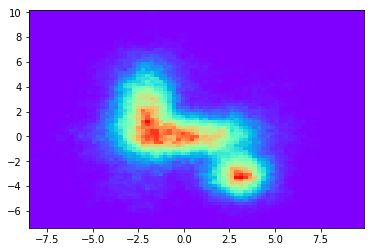

In [35]:
fig, ax = plt.subplots()
hist = ax.hist2d(Xs_all[:,0], Xs_all[:,1], bins=75)